In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# column unnamed is droped.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


we have no null values till entry but range index is high so rows with nan values have to be removed.
Now we have to use date, day and month for the model.

In [7]:
data.dropna(how="all" ,inplace=True)

Now we have clean data

In [8]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [9]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


Now analyse data with some plots

Text(0.5, 1.0, 'Average Price')

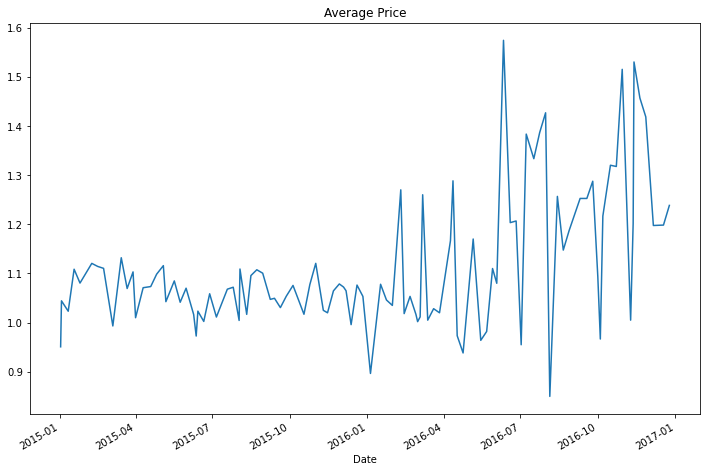

In [10]:
byDate=data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

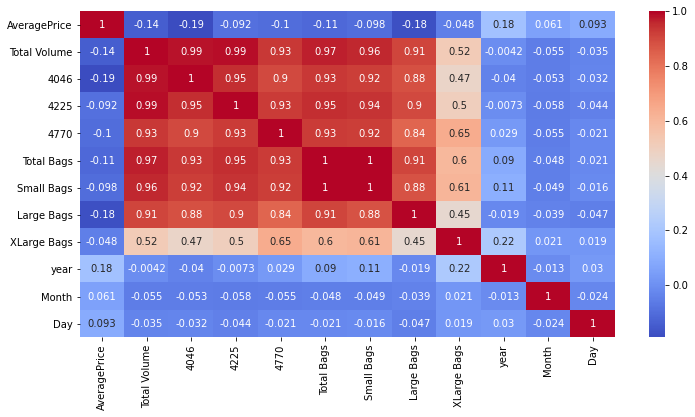

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

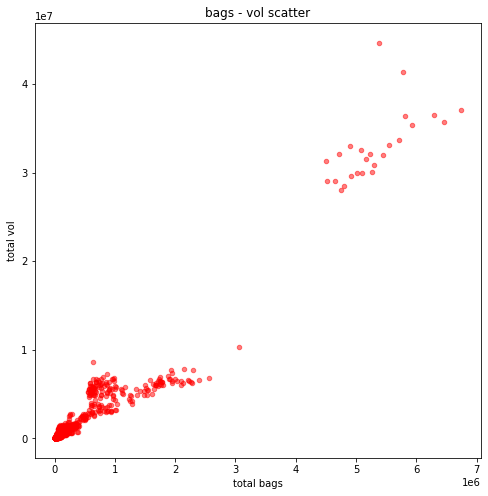

In [19]:
data.plot(kind='scatter', x='Total Bags', y='Total Volume', alpha=0.5, c='r',figsize=(8,8))
plt.xlabel('total bags')
plt.ylabel('total vol')
plt.title('bags - vol scatter')
plt.show()

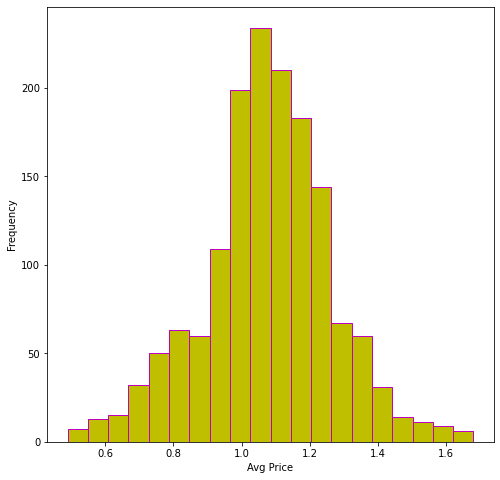

In [20]:
data.AveragePrice.plot(kind='hist', bins = 20, figsize =(8,8), color='y', EdgeColor='m')
plt.xlabel('Avg Price')
plt.show()

In [12]:
data['region'].nunique()

51

In [13]:
data['type'].nunique()

1

So as we can see region has 51 and type has 1 unique types , so both columns should be dropped as 51 dummies in region and only 1 in type.
Date feature shall also be dropped as we have day , month and date.

In [32]:
data.drop(['region','Date','type'],axis=1 , inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   float64
 10  Month         1517 non-null   int64  
 11  Day           1517 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 194.1 KB


Now we will use linear regression model. As our target variable is continuous 'Averageprice'

In [36]:
X=data.iloc[:,1:11]
y=data['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 Creating and Training the Model

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1348720437228149
MSE: 0.029887882372110357
RMSE: 0.17288112208136075


The RMSE is low so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions

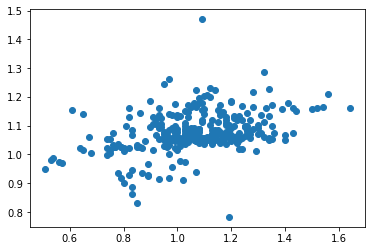

In [40]:
plt.scatter(x=y_test,y=pred)

As we can see that we dont have a straigt line so I am not sure that this is the best model we can apply on our data

Lets try working with the DecisionTree Regressor model

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

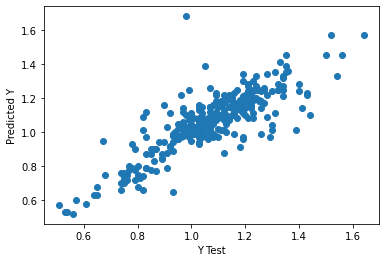

In [42]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 we nearly have a straigt line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07256578947368422
MSE: 0.011540789473684207
RMSE: 0.10742806650817191


Our RMSE is lower than the previous one.

In [45]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05765789473684215
MSE: 0.006111366973684224
RMSE: 0.07817523248244436


Now we got the lowest RMSE than previous two models.

C:\Users\baliy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


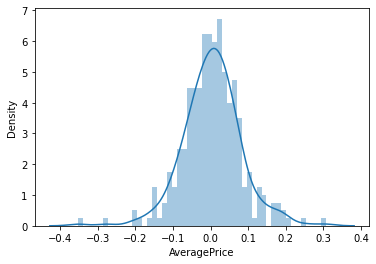

In [47]:
sns.distplot((y_test-pred),bins=50)

residuals looked to be normally distributed 

,Y Test,Pred
724,1.18,1.1151
812,1.25,1.2049
1466,1.08,1.0962
1469,1.07,1.1428
51,1.22,1.2533


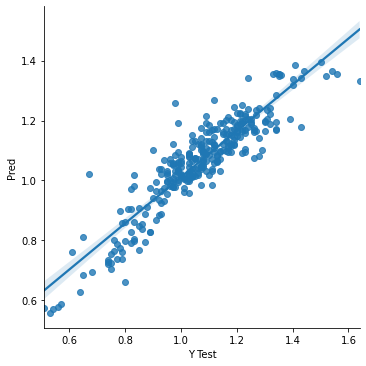

In [48]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()